In [3]:
!pip install tensorflow 
!pip install stable_baselines3 
!pip install gymnasium
!pip install gym-anytrading 
!pip install tensorflow-gpu

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - RL stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# Load GME trading data
df = pd.read_csv('gmedata.csv')

# Convert data to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

# Set Date as the index
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,19.000000,19.100000,17.15,17.250000,10022500,0,0
2021-01-05,17.350000,18.080000,17.23,17.370001,4961500,0,0
2021-01-06,17.340000,18.980000,17.33,18.360001,6056200,0,0
2021-01-07,18.469999,19.450001,18.02,18.080000,6129300,0,0
2021-01-08,18.180000,18.299999,17.08,17.690001,6482000,0,0


In [6]:
# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

# View environment features
env.unwrapped.signal_features

# View environment prices
env.unwrapped.prices

array([ 17.25,  17.37,  18.36,  18.08,  17.69,  19.94,  19.95,  31.4 ,
        39.91,  35.5 ,  39.36,  39.12,  43.03,  65.01,  76.79, 147.98,
       347.51, 193.6 , 325.  , 225.  ,  90.  ,  92.41,  53.5 ,  63.77,
        60.  ,  50.31,  51.2 ,  51.1 ,  52.4 ,  49.51,  45.94,  40.69,
        40.59,  46.  ,  44.97,  91.71, 108.73, 101.74, 120.4 , 118.18,
       124.18, 132.35, 137.74, 194.5 , 246.9 , 265.  , 260.  , 264.5 ,
       220.14, 208.17, 209.81, 201.75, 200.27, 194.49, 181.75, 120.34,
       183.75, 181.  , 181.3 , 194.46, 189.82, 191.45, 186.95, 184.5 ,
       177.97, 170.26, 158.36, 141.09, 140.99, 166.53, 156.44, 154.69],
      dtype=float32)

info: {'total_reward': 4.079990386962891, 'total_profit': 1.6189806834738079, 'position': <Positions.Short: 0>}


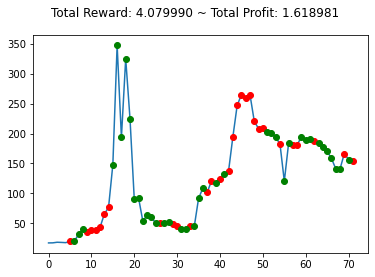

In [7]:
# Explore the environment
env.action_space

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

In [8]:
# Creating our dummy vectorizing environment
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

# Initializing and training the A2C model
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Using cpu device


C:\Users\Revanth\anaconda3\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


------------------------------------
| time/                 |          |
|    fps                | 225      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | -0.008   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 32       |
|    value_loss         | 2.76e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 230      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -0.0267  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 8.41     |
|    value_loss         | 235      |
-

------------------------------------
| time/                 |          |
|    fps                | 232      |
|    iterations         | 1700     |
|    time_elapsed       | 36       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.231   |
|    explained_variance | -5.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | -0.0855  |
|    value_loss         | 2.81     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 233       |
|    iterations         | 1800      |
|    time_elapsed       | 38        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.0384   |
|    explained_variance | 0.138     |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -0.000605 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 3300     |
|    time_elapsed       | 68       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.0412  |
|    explained_variance | 0.000984 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | -0.0155  |
|    value_loss         | 2.59     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 3400     |
|    time_elapsed       | 69       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.0203  |
|    explained_variance | -0.188   |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | 0.22     |
|    value_loss         | 3.75e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 4900     |
|    time_elapsed       | 100      |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.00265 |
|    explained_variance | -0.00807 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 0.00569  |
|    value_loss         | 452      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 5000     |
|    time_elapsed       | 102      |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | -0.494   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | -2.21    |
|    value_loss         | 2.67e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 6500     |
|    time_elapsed       | 134      |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.058   |
|    explained_variance | 0.955    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | 0.00608  |
|    value_loss         | 0.0328   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 6600      |
|    time_elapsed       | 136       |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.00203  |
|    explained_variance | -0.235    |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -0.000579 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 8100     |
|    time_elapsed       | 167      |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.0203  |
|    explained_variance | 0.0158   |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.00759  |
|    value_loss         | 70.7     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 8200      |
|    time_elapsed       | 169       |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.000998 |
|    explained_variance | -0.0672   |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | 0.00247   |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 9700     |
|    time_elapsed       | 201      |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.00406 |
|    explained_variance | -3.03    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | -0.00164 |
|    value_loss         | 4.89     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 9800     |
|    time_elapsed       | 203      |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.00845 |
|    explained_variance | -1.99    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 0.000871 |
|    value_loss         | 2.28     |
-

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 11300     |
|    time_elapsed       | 235       |
|    total_timesteps    | 56500     |
| train/                |           |
|    entropy_loss       | -5.82e-06 |
|    explained_variance | -66.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 11299     |
|    policy_loss        | -2.32e-06 |
|    value_loss         | 129       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 11400    |
|    time_elapsed       | 237      |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -0.00269 |
|    explained_variance | 0.176    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11399    |
|    policy_loss        | 0.000333 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 12900    |
|    time_elapsed       | 268      |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.00187 |
|    explained_variance | 0.000208 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 0.0603   |
|    value_loss         | 5.74e+04 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 13000     |
|    time_elapsed       | 270       |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -2.68e-06 |
|    explained_variance | 0.854     |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -1.2e-08  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 14500     |
|    time_elapsed       | 302       |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -0.000102 |
|    explained_variance | -144      |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | -0.000152 |
|    value_loss         | 211       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 14600    |
|    time_elapsed       | 304      |
|    total_timesteps    | 73000    |
| train/                |          |
|    entropy_loss       | -0.00121 |
|    explained_variance | -72.1    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14599    |
|    policy_loss        | -0.00288 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 16100    |
|    time_elapsed       | 336      |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.0381  |
|    explained_variance | 0.568    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | 0.229    |
|    value_loss         | 1.28e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 16200    |
|    time_elapsed       | 338      |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.00405 |
|    explained_variance | 0.0353   |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | 0.0392   |
|    value_loss         | 2.08e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 17700     |
|    time_elapsed       | 369       |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -0.00109  |
|    explained_variance | -15.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | -0.000539 |
|    value_loss         | 88.8      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 17800     |
|    time_elapsed       | 372       |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -1.01e-05 |
|    explained_variance | -18.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | -2.67e-06 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 19300    |
|    time_elapsed       | 403      |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0.767    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | -0.28    |
|    value_loss         | 2.01e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 19400    |
|    time_elapsed       | 405      |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | -2.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | 5.58     |
|    value_loss         | 416      |
-

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 20900    |
|    time_elapsed       | 436      |
|    total_timesteps    | 104500   |
| train/                |          |
|    entropy_loss       | -0.122   |
|    explained_variance | 0.996    |
|    learning_rate      | 0.0007   |
|    n_updates          | 20899    |
|    policy_loss        | 0.601    |
|    value_loss         | 21.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 21000    |
|    time_elapsed       | 438      |
|    total_timesteps    | 105000   |
| train/                |          |
|    entropy_loss       | -0.0133  |
|    explained_variance | -32.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 20999    |
|    policy_loss        | 0.00138  |
|    value_loss         | 201      |
-

-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 22500     |
|    time_elapsed       | 470       |
|    total_timesteps    | 112500    |
| train/                |           |
|    entropy_loss       | -4.47e-06 |
|    explained_variance | -290      |
|    learning_rate      | 0.0007    |
|    n_updates          | 22499     |
|    policy_loss        | -6.07e-07 |
|    value_loss         | 9e+03     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 22600     |
|    time_elapsed       | 472       |
|    total_timesteps    | 113000    |
| train/                |           |
|    entropy_loss       | -0.000305 |
|    explained_variance | 0.895     |
|    learning_rate      | 0.0007    |
|    n_updates          | 22599     |
|    policy_loss        | -0.000124 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 24100    |
|    time_elapsed       | 504      |
|    total_timesteps    | 120500   |
| train/                |          |
|    entropy_loss       | -0.0201  |
|    explained_variance | -89.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 24099    |
|    policy_loss        | -0.0534  |
|    value_loss         | 183      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 24200    |
|    time_elapsed       | 506      |
|    total_timesteps    | 121000   |
| train/                |          |
|    entropy_loss       | -0.0959  |
|    explained_variance | 0.331    |
|    learning_rate      | 0.0007   |
|    n_updates          | 24199    |
|    policy_loss        | -5.39    |
|    value_loss         | 1.42e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 25700    |
|    time_elapsed       | 538      |
|    total_timesteps    | 128500   |
| train/                |          |
|    entropy_loss       | -0.0808  |
|    explained_variance | -10.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 25699    |
|    policy_loss        | -0.186   |
|    value_loss         | 12.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 25800    |
|    time_elapsed       | 540      |
|    total_timesteps    | 129000   |
| train/                |          |
|    entropy_loss       | -0.00178 |
|    explained_variance | -494     |
|    learning_rate      | 0.0007   |
|    n_updates          | 25799    |
|    policy_loss        | 0.00445  |
|    value_loss         | 2.36e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 27300    |
|    time_elapsed       | 571      |
|    total_timesteps    | 136500   |
| train/                |          |
|    entropy_loss       | -0.0616  |
|    explained_variance | -3.21    |
|    learning_rate      | 0.0007   |
|    n_updates          | 27299    |
|    policy_loss        | -0.124   |
|    value_loss         | 194      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 238       |
|    iterations         | 27400     |
|    time_elapsed       | 573       |
|    total_timesteps    | 137000    |
| train/                |           |
|    entropy_loss       | -0.0842   |
|    explained_variance | -3.07e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 27399     |
|    policy_loss        | -0.378    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 28900    |
|    time_elapsed       | 605      |
|    total_timesteps    | 144500   |
| train/                |          |
|    entropy_loss       | -0.16    |
|    explained_variance | 0.692    |
|    learning_rate      | 0.0007   |
|    n_updates          | 28899    |
|    policy_loss        | 0.813    |
|    value_loss         | 58.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 29000    |
|    time_elapsed       | 607      |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.00374 |
|    explained_variance | -46.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 28999    |
|    policy_loss        | -0.00579 |
|    value_loss         | 57.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 30500    |
|    time_elapsed       | 638      |
|    total_timesteps    | 152500   |
| train/                |          |
|    entropy_loss       | -0.00131 |
|    explained_variance | 0.287    |
|    learning_rate      | 0.0007   |
|    n_updates          | 30499    |
|    policy_loss        | 0.00376  |
|    value_loss         | 589      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 30600    |
|    time_elapsed       | 641      |
|    total_timesteps    | 153000   |
| train/                |          |
|    entropy_loss       | -0.0519  |
|    explained_variance | 0.489    |
|    learning_rate      | 0.0007   |
|    n_updates          | 30599    |
|    policy_loss        | -0.0621  |
|    value_loss         | 18.3     |
-

-------------------------------------
| time/                 |           |
|    fps                | 238       |
|    iterations         | 32100     |
|    time_elapsed       | 671       |
|    total_timesteps    | 160500    |
| train/                |           |
|    entropy_loss       | -1.55e-06 |
|    explained_variance | -172      |
|    learning_rate      | 0.0007    |
|    n_updates          | 32099     |
|    policy_loss        | -1.02e-06 |
|    value_loss         | 292       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 238      |
|    iterations         | 32200    |
|    time_elapsed       | 673      |
|    total_timesteps    | 161000   |
| train/                |          |
|    entropy_loss       | -0.0256  |
|    explained_variance | -193     |
|    learning_rate      | 0.0007   |
|    n_updates          | 32199    |
|    policy_loss        | 0.285    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 33700    |
|    time_elapsed       | 704      |
|    total_timesteps    | 168500   |
| train/                |          |
|    entropy_loss       | -0.00114 |
|    explained_variance | -44.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 33699    |
|    policy_loss        | -0.00147 |
|    value_loss         | 50.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 33800    |
|    time_elapsed       | 706      |
|    total_timesteps    | 169000   |
| train/                |          |
|    entropy_loss       | -0.00241 |
|    explained_variance | -2.25    |
|    learning_rate      | 0.0007   |
|    n_updates          | 33799    |
|    policy_loss        | -0.0769  |
|    value_loss         | 3.67e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 35300    |
|    time_elapsed       | 737      |
|    total_timesteps    | 176500   |
| train/                |          |
|    entropy_loss       | -0.00915 |
|    explained_variance | 0.363    |
|    learning_rate      | 0.0007   |
|    n_updates          | 35299    |
|    policy_loss        | 0.259    |
|    value_loss         | 3.21e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 35400    |
|    time_elapsed       | 738      |
|    total_timesteps    | 177000   |
| train/                |          |
|    entropy_loss       | -0.00798 |
|    explained_variance | -353     |
|    learning_rate      | 0.0007   |
|    n_updates          | 35399    |
|    policy_loss        | -0.00676 |
|    value_loss         | 6.75     |
-

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 36900    |
|    time_elapsed       | 769      |
|    total_timesteps    | 184500   |
| train/                |          |
|    entropy_loss       | -0.00612 |
|    explained_variance | -2.54    |
|    learning_rate      | 0.0007   |
|    n_updates          | 36899    |
|    policy_loss        | 0.00954  |
|    value_loss         | 143      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 239       |
|    iterations         | 37000     |
|    time_elapsed       | 771       |
|    total_timesteps    | 185000    |
| train/                |           |
|    entropy_loss       | -0.00115  |
|    explained_variance | -76       |
|    learning_rate      | 0.0007    |
|    n_updates          | 36999     |
|    policy_loss        | -0.000101 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 38500    |
|    time_elapsed       | 802      |
|    total_timesteps    | 192500   |
| train/                |          |
|    entropy_loss       | -0.047   |
|    explained_variance | 0.0856   |
|    learning_rate      | 0.0007   |
|    n_updates          | 38499    |
|    policy_loss        | 0.0551   |
|    value_loss         | 310      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 38600    |
|    time_elapsed       | 804      |
|    total_timesteps    | 193000   |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0.521    |
|    learning_rate      | 0.0007   |
|    n_updates          | 38599    |
|    policy_loss        | 2.67     |
|    value_loss         | 854      |
-

------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 40100    |
|    time_elapsed       | 835      |
|    total_timesteps    | 200500   |
| train/                |          |
|    entropy_loss       | -0.00115 |
|    explained_variance | -31.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 40099    |
|    policy_loss        | -0.00168 |
|    value_loss         | 73.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 239      |
|    iterations         | 40200    |
|    time_elapsed       | 837      |
|    total_timesteps    | 201000   |
| train/                |          |
|    entropy_loss       | -0.0471  |
|    explained_variance | -1.93    |
|    learning_rate      | 0.0007   |
|    n_updates          | 40199    |
|    policy_loss        | -0.109   |
|    value_loss         | 180      |
-

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 41700     |
|    time_elapsed       | 867       |
|    total_timesteps    | 208500    |
| train/                |           |
|    entropy_loss       | -2.31e-06 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 41699     |
|    policy_loss        | -1.02e-07 |
|    value_loss         | 9.21      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 41800    |
|    time_elapsed       | 870      |
|    total_timesteps    | 209000   |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | -6.17    |
|    learning_rate      | 0.0007   |
|    n_updates          | 41799    |
|    policy_loss        | -31.1    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 43300    |
|    time_elapsed       | 900      |
|    total_timesteps    | 216500   |
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0.749    |
|    learning_rate      | 0.0007   |
|    n_updates          | 43299    |
|    policy_loss        | 0.478    |
|    value_loss         | 5.19e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 43400    |
|    time_elapsed       | 902      |
|    total_timesteps    | 217000   |
| train/                |          |
|    entropy_loss       | -0.0167  |
|    explained_variance | -113     |
|    learning_rate      | 0.0007   |
|    n_updates          | 43399    |
|    policy_loss        | -0.0114  |
|    value_loss         | 6.95     |
-

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 44900     |
|    time_elapsed       | 934       |
|    total_timesteps    | 224500    |
| train/                |           |
|    entropy_loss       | -4.14e-08 |
|    explained_variance | 0.184     |
|    learning_rate      | 0.0007    |
|    n_updates          | 44899     |
|    policy_loss        | -0        |
|    value_loss         | 35.7      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 45000     |
|    time_elapsed       | 936       |
|    total_timesteps    | 225000    |
| train/                |           |
|    entropy_loss       | -2.19e-07 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 44999     |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 46500     |
|    time_elapsed       | 967       |
|    total_timesteps    | 232500    |
| train/                |           |
|    entropy_loss       | -0.0773   |
|    explained_variance | -1.92e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 46499     |
|    policy_loss        | -0.409    |
|    value_loss         | 44.9      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 46600    |
|    time_elapsed       | 969      |
|    total_timesteps    | 233000   |
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0.94     |
|    learning_rate      | 0.0007   |
|    n_updates          | 46599    |
|    policy_loss        | 5.33     |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 48100     |
|    time_elapsed       | 1000      |
|    total_timesteps    | 240500    |
| train/                |           |
|    entropy_loss       | -0.00549  |
|    explained_variance | -5.45e+04 |
|    learning_rate      | 0.0007    |
|    n_updates          | 48099     |
|    policy_loss        | 0.00077   |
|    value_loss         | 0.691     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 48200     |
|    time_elapsed       | 1002      |
|    total_timesteps    | 241000    |
| train/                |           |
|    entropy_loss       | -3.02e-08 |
|    explained_variance | -230      |
|    learning_rate      | 0.0007    |
|    n_updates          | 48199     |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 49700    |
|    time_elapsed       | 1033     |
|    total_timesteps    | 248500   |
| train/                |          |
|    entropy_loss       | -0.0785  |
|    explained_variance | -0.0103  |
|    learning_rate      | 0.0007   |
|    n_updates          | 49699    |
|    policy_loss        | 0.299    |
|    value_loss         | 59       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 49800    |
|    time_elapsed       | 1035     |
|    total_timesteps    | 249000   |
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | -0.634   |
|    learning_rate      | 0.0007   |
|    n_updates          | 49799    |
|    policy_loss        | -26.9    |
|    value_loss         | 8.32e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 51300    |
|    time_elapsed       | 1067     |
|    total_timesteps    | 256500   |
| train/                |          |
|    entropy_loss       | -0.0193  |
|    explained_variance | -22.1    |
|    learning_rate      | 0.0007   |
|    n_updates          | 51299    |
|    policy_loss        | -0.104   |
|    value_loss         | 385      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 51400    |
|    time_elapsed       | 1069     |
|    total_timesteps    | 257000   |
| train/                |          |
|    entropy_loss       | -0.0193  |
|    explained_variance | -0.0241  |
|    learning_rate      | 0.0007   |
|    n_updates          | 51399    |
|    policy_loss        | -53.2    |
|    value_loss         | 1.98e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 52900    |
|    time_elapsed       | 1100     |
|    total_timesteps    | 264500   |
| train/                |          |
|    entropy_loss       | -0.00296 |
|    explained_variance | -2.11    |
|    learning_rate      | 0.0007   |
|    n_updates          | 52899    |
|    policy_loss        | -0.0222  |
|    value_loss         | 2.73e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 53000    |
|    time_elapsed       | 1102     |
|    total_timesteps    | 265000   |
| train/                |          |
|    entropy_loss       | -0.00254 |
|    explained_variance | 0.923    |
|    learning_rate      | 0.0007   |
|    n_updates          | 52999    |
|    policy_loss        | 0.00208  |
|    value_loss         | 15       |
-

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 54500     |
|    time_elapsed       | 1133      |
|    total_timesteps    | 272500    |
| train/                |           |
|    entropy_loss       | -6.34e-05 |
|    explained_variance | -0.84     |
|    learning_rate      | 0.0007    |
|    n_updates          | 54499     |
|    policy_loss        | -8.44e-08 |
|    value_loss         | 0.000265  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 54600     |
|    time_elapsed       | 1135      |
|    total_timesteps    | 273000    |
| train/                |           |
|    entropy_loss       | -2.75e-06 |
|    explained_variance | -0.326    |
|    learning_rate      | 0.0007    |
|    n_updates          | 54599     |
|    policy_loss        | -1.78e-07 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 56100     |
|    time_elapsed       | 1166      |
|    total_timesteps    | 280500    |
| train/                |           |
|    entropy_loss       | -0.000139 |
|    explained_variance | -0.686    |
|    learning_rate      | 0.0007    |
|    n_updates          | 56099     |
|    policy_loss        | -1.67e-06 |
|    value_loss         | 0.0307    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 56200     |
|    time_elapsed       | 1168      |
|    total_timesteps    | 281000    |
| train/                |           |
|    entropy_loss       | -0.0522   |
|    explained_variance | -1.36e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 56199     |
|    policy_loss        | -0.164    |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 57700    |
|    time_elapsed       | 1199     |
|    total_timesteps    | 288500   |
| train/                |          |
|    entropy_loss       | -0.0256  |
|    explained_variance | -114     |
|    learning_rate      | 0.0007   |
|    n_updates          | 57699    |
|    policy_loss        | 0.115    |
|    value_loss         | 8.05e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 57800     |
|    time_elapsed       | 1201      |
|    total_timesteps    | 289000    |
| train/                |           |
|    entropy_loss       | -0.000437 |
|    explained_variance | -8.68e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 57799     |
|    policy_loss        | -6.44e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 59300    |
|    time_elapsed       | 1233     |
|    total_timesteps    | 296500   |
| train/                |          |
|    entropy_loss       | -0.0308  |
|    explained_variance | -65.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 59299    |
|    policy_loss        | 0.549    |
|    value_loss         | 7.7e+03  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 59400     |
|    time_elapsed       | 1235      |
|    total_timesteps    | 297000    |
| train/                |           |
|    entropy_loss       | -3.46e-07 |
|    explained_variance | -1.46     |
|    learning_rate      | 0.0007    |
|    n_updates          | 59399     |
|    policy_loss        | -0        |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 60900     |
|    time_elapsed       | 1265      |
|    total_timesteps    | 304500    |
| train/                |           |
|    entropy_loss       | -0.000702 |
|    explained_variance | 0.511     |
|    learning_rate      | 0.0007    |
|    n_updates          | 60899     |
|    policy_loss        | 0.00358   |
|    value_loss         | 3.46e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 61000    |
|    time_elapsed       | 1267     |
|    total_timesteps    | 305000   |
| train/                |          |
|    entropy_loss       | -0.00111 |
|    explained_variance | -12.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 60999    |
|    policy_loss        | -0.00201 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 62500     |
|    time_elapsed       | 1298      |
|    total_timesteps    | 312500    |
| train/                |           |
|    entropy_loss       | -3.87e-07 |
|    explained_variance | -25.8     |
|    learning_rate      | 0.0007    |
|    n_updates          | 62499     |
|    policy_loss        | -0        |
|    value_loss         | 0.149     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 62600    |
|    time_elapsed       | 1300     |
|    total_timesteps    | 313000   |
| train/                |          |
|    entropy_loss       | -0.00404 |
|    explained_variance | -380     |
|    learning_rate      | 0.0007   |
|    n_updates          | 62599    |
|    policy_loss        | 0.0151   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 64100    |
|    time_elapsed       | 1332     |
|    total_timesteps    | 320500   |
| train/                |          |
|    entropy_loss       | -5e-07   |
|    explained_variance | -173     |
|    learning_rate      | 0.0007   |
|    n_updates          | 64099    |
|    policy_loss        | -0       |
|    value_loss         | 2.36     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 64200     |
|    time_elapsed       | 1334      |
|    total_timesteps    | 321000    |
| train/                |           |
|    entropy_loss       | -1.24e-05 |
|    explained_variance | 0.803     |
|    learning_rate      | 0.0007    |
|    n_updates          | 64199     |
|    policy_loss        | 3.84e-06  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 65700    |
|    time_elapsed       | 1365     |
|    total_timesteps    | 328500   |
| train/                |          |
|    entropy_loss       | -0.0791  |
|    explained_variance | 0.964    |
|    learning_rate      | 0.0007   |
|    n_updates          | 65699    |
|    policy_loss        | 0.292    |
|    value_loss         | 46.9     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 65800     |
|    time_elapsed       | 1367      |
|    total_timesteps    | 329000    |
| train/                |           |
|    entropy_loss       | -5.06e-06 |
|    explained_variance | 0.58      |
|    learning_rate      | 0.0007    |
|    n_updates          | 65799     |
|    policy_loss        | 1.73e-06  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 67300     |
|    time_elapsed       | 1398      |
|    total_timesteps    | 336500    |
| train/                |           |
|    entropy_loss       | -0.000423 |
|    explained_variance | -875      |
|    learning_rate      | 0.0007    |
|    n_updates          | 67299     |
|    policy_loss        | -0.000837 |
|    value_loss         | 121       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 67400     |
|    time_elapsed       | 1401      |
|    total_timesteps    | 337000    |
| train/                |           |
|    entropy_loss       | -3.65e-07 |
|    explained_variance | -11.2     |
|    learning_rate      | 0.0007    |
|    n_updates          | 67399     |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 68900    |
|    time_elapsed       | 1432     |
|    total_timesteps    | 344500   |
| train/                |          |
|    entropy_loss       | -0.0748  |
|    explained_variance | 0.994    |
|    learning_rate      | 0.0007   |
|    n_updates          | 68899    |
|    policy_loss        | 1.47     |
|    value_loss         | 6.7      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 69000    |
|    time_elapsed       | 1435     |
|    total_timesteps    | 345000   |
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 0.706    |
|    learning_rate      | 0.0007   |
|    n_updates          | 68999    |
|    policy_loss        | -0.0402  |
|    value_loss         | 441      |
-

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 70500    |
|    time_elapsed       | 1464     |
|    total_timesteps    | 352500   |
| train/                |          |
|    entropy_loss       | -0.0836  |
|    explained_variance | -4.4e+03 |
|    learning_rate      | 0.0007   |
|    n_updates          | 70499    |
|    policy_loss        | -0.474   |
|    value_loss         | 91.6     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 70600     |
|    time_elapsed       | 1466      |
|    total_timesteps    | 353000    |
| train/                |           |
|    entropy_loss       | -4.13e-06 |
|    explained_variance | -101      |
|    learning_rate      | 0.0007    |
|    n_updates          | 70599     |
|    policy_loss        | 2.4e-07   |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 72100     |
|    time_elapsed       | 1498      |
|    total_timesteps    | 360500    |
| train/                |           |
|    entropy_loss       | -3.85e-05 |
|    explained_variance | 0.997     |
|    learning_rate      | 0.0007    |
|    n_updates          | 72099     |
|    policy_loss        | 2.72e-05  |
|    value_loss         | 42.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 72200     |
|    time_elapsed       | 1500      |
|    total_timesteps    | 361000    |
| train/                |           |
|    entropy_loss       | -0.0134   |
|    explained_variance | -1.27e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 72199     |
|    policy_loss        | -0.0604   |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 73700     |
|    time_elapsed       | 1533      |
|    total_timesteps    | 368500    |
| train/                |           |
|    entropy_loss       | -1.17e-07 |
|    explained_variance | 0.987     |
|    learning_rate      | 0.0007    |
|    n_updates          | 73699     |
|    policy_loss        | -0        |
|    value_loss         | 47.6      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 73800     |
|    time_elapsed       | 1535      |
|    total_timesteps    | 369000    |
| train/                |           |
|    entropy_loss       | -0.000173 |
|    explained_variance | -3.36     |
|    learning_rate      | 0.0007    |
|    n_updates          | 73799     |
|    policy_loss        | -5.24e-05 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 75300     |
|    time_elapsed       | 1566      |
|    total_timesteps    | 376500    |
| train/                |           |
|    entropy_loss       | -1.31e-07 |
|    explained_variance | -20       |
|    learning_rate      | 0.0007    |
|    n_updates          | 75299     |
|    policy_loss        | -0        |
|    value_loss         | 117       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 75400     |
|    time_elapsed       | 1568      |
|    total_timesteps    | 377000    |
| train/                |           |
|    entropy_loss       | -2.24e-07 |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 75399     |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 76900     |
|    time_elapsed       | 1599      |
|    total_timesteps    | 384500    |
| train/                |           |
|    entropy_loss       | -7.24e-05 |
|    explained_variance | -33.3     |
|    learning_rate      | 0.0007    |
|    n_updates          | 76899     |
|    policy_loss        | 6.33e-07  |
|    value_loss         | 0.23      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 77000     |
|    time_elapsed       | 1601      |
|    total_timesteps    | 385000    |
| train/                |           |
|    entropy_loss       | -3.35e-08 |
|    explained_variance | 0.997     |
|    learning_rate      | 0.0007    |
|    n_updates          | 76999     |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 78500     |
|    time_elapsed       | 1630      |
|    total_timesteps    | 392500    |
| train/                |           |
|    entropy_loss       | -6.26e-07 |
|    explained_variance | 0.993     |
|    learning_rate      | 0.0007    |
|    n_updates          | 78499     |
|    policy_loss        | -0        |
|    value_loss         | 0.0038    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 78600     |
|    time_elapsed       | 1632      |
|    total_timesteps    | 393000    |
| train/                |           |
|    entropy_loss       | -1.98e-06 |
|    explained_variance | -121      |
|    learning_rate      | 0.0007    |
|    n_updates          | 78599     |
|    policy_loss        | 3.41e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 80100     |
|    time_elapsed       | 1663      |
|    total_timesteps    | 400500    |
| train/                |           |
|    entropy_loss       | -0.00229  |
|    explained_variance | -2.26     |
|    learning_rate      | 0.0007    |
|    n_updates          | 80099     |
|    policy_loss        | -0.000455 |
|    value_loss         | 36        |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 80200     |
|    time_elapsed       | 1665      |
|    total_timesteps    | 401000    |
| train/                |           |
|    entropy_loss       | -0.000493 |
|    explained_variance | -27.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 80199     |
|    policy_loss        | 6.36e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 81700     |
|    time_elapsed       | 1696      |
|    total_timesteps    | 408500    |
| train/                |           |
|    entropy_loss       | -1.31e-08 |
|    explained_variance | 0.981     |
|    learning_rate      | 0.0007    |
|    n_updates          | 81699     |
|    policy_loss        | -0        |
|    value_loss         | 357       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 81800     |
|    time_elapsed       | 1699      |
|    total_timesteps    | 409000    |
| train/                |           |
|    entropy_loss       | -2.22e-05 |
|    explained_variance | 0.873     |
|    learning_rate      | 0.0007    |
|    n_updates          | 81799     |
|    policy_loss        | -3.06e-07 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 83300    |
|    time_elapsed       | 1729     |
|    total_timesteps    | 416500   |
| train/                |          |
|    entropy_loss       | -0.00907 |
|    explained_variance | -0.42    |
|    learning_rate      | 0.0007   |
|    n_updates          | 83299    |
|    policy_loss        | 0.0355   |
|    value_loss         | 2.71e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 83400    |
|    time_elapsed       | 1731     |
|    total_timesteps    | 417000   |
| train/                |          |
|    entropy_loss       | -0.0435  |
|    explained_variance | 0.699    |
|    learning_rate      | 0.0007   |
|    n_updates          | 83399    |
|    policy_loss        | -0.259   |
|    value_loss         | 783      |
-

------------------------------------
| time/                 |          |
|    fps                | 240      |
|    iterations         | 84900    |
|    time_elapsed       | 1762     |
|    total_timesteps    | 424500   |
| train/                |          |
|    entropy_loss       | -0.0245  |
|    explained_variance | 0.00952  |
|    learning_rate      | 0.0007   |
|    n_updates          | 84899    |
|    policy_loss        | 0.205    |
|    value_loss         | 987      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 240       |
|    iterations         | 85000     |
|    time_elapsed       | 1764      |
|    total_timesteps    | 425000    |
| train/                |           |
|    entropy_loss       | -1.79e-08 |
|    explained_variance | -0.686    |
|    learning_rate      | 0.0007    |
|    n_updates          | 84999     |
|    policy_loss        | -0        |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 86500     |
|    time_elapsed       | 1794      |
|    total_timesteps    | 432500    |
| train/                |           |
|    entropy_loss       | -3.24e-05 |
|    explained_variance | -57.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 86499     |
|    policy_loss        | 5.56e-07  |
|    value_loss         | 0.293     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 86600     |
|    time_elapsed       | 1796      |
|    total_timesteps    | 433000    |
| train/                |           |
|    entropy_loss       | -5.41e-06 |
|    explained_variance | 0.18      |
|    learning_rate      | 0.0007    |
|    n_updates          | 86599     |
|    policy_loss        | 8.73e-06  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 88100    |
|    time_elapsed       | 1825     |
|    total_timesteps    | 440500   |
| train/                |          |
|    entropy_loss       | -0.00108 |
|    explained_variance | 0.561    |
|    learning_rate      | 0.0007   |
|    n_updates          | 88099    |
|    policy_loss        | 0.00637  |
|    value_loss         | 2.66e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 88200    |
|    time_elapsed       | 1827     |
|    total_timesteps    | 441000   |
| train/                |          |
|    entropy_loss       | -0.025   |
|    explained_variance | -0.00249 |
|    learning_rate      | 0.0007   |
|    n_updates          | 88199    |
|    policy_loss        | -0.218   |
|    value_loss         | 635      |
-

-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 89700     |
|    time_elapsed       | 1857      |
|    total_timesteps    | 448500    |
| train/                |           |
|    entropy_loss       | -0.000163 |
|    explained_variance | -256      |
|    learning_rate      | 0.0007    |
|    n_updates          | 89699     |
|    policy_loss        | -0.00114  |
|    value_loss         | 2.04e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 89800     |
|    time_elapsed       | 1859      |
|    total_timesteps    | 449000    |
| train/                |           |
|    entropy_loss       | -8.64e-08 |
|    explained_variance | -15.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 89799     |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 91300    |
|    time_elapsed       | 1889     |
|    total_timesteps    | 456500   |
| train/                |          |
|    entropy_loss       | -0.0374  |
|    explained_variance | 0.348    |
|    learning_rate      | 0.0007   |
|    n_updates          | 91299    |
|    policy_loss        | -0.0583  |
|    value_loss         | 688      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 91400     |
|    time_elapsed       | 1891      |
|    total_timesteps    | 457000    |
| train/                |           |
|    entropy_loss       | -0.000291 |
|    explained_variance | 0.392     |
|    learning_rate      | 0.0007    |
|    n_updates          | 91399     |
|    policy_loss        | 0.00188   |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 92900     |
|    time_elapsed       | 1922      |
|    total_timesteps    | 464500    |
| train/                |           |
|    entropy_loss       | -0.000107 |
|    explained_variance | -729      |
|    learning_rate      | 0.0007    |
|    n_updates          | 92899     |
|    policy_loss        | -0.000319 |
|    value_loss         | 984       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 93000     |
|    time_elapsed       | 1924      |
|    total_timesteps    | 465000    |
| train/                |           |
|    entropy_loss       | -2.49e-06 |
|    explained_variance | -13.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 92999     |
|    policy_loss        | -5.3e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 94500     |
|    time_elapsed       | 1954      |
|    total_timesteps    | 472500    |
| train/                |           |
|    entropy_loss       | -2.93e-09 |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 94499     |
|    policy_loss        | -0        |
|    value_loss         | 33.4      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 94600     |
|    time_elapsed       | 1956      |
|    total_timesteps    | 473000    |
| train/                |           |
|    entropy_loss       | -0.000529 |
|    explained_variance | -1.1      |
|    learning_rate      | 0.0007    |
|    n_updates          | 94599     |
|    policy_loss        | 0.00227   |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 241       |
|    iterations         | 96100     |
|    time_elapsed       | 1986      |
|    total_timesteps    | 480500    |
| train/                |           |
|    entropy_loss       | -8.28e-05 |
|    explained_variance | 0.902     |
|    learning_rate      | 0.0007    |
|    n_updates          | 96099     |
|    policy_loss        | 0.000511  |
|    value_loss         | 2.97e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 241      |
|    iterations         | 96200    |
|    time_elapsed       | 1988     |
|    total_timesteps    | 481000   |
| train/                |          |
|    entropy_loss       | -0.0372  |
|    explained_variance | -19.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 96199    |
|    policy_loss        | -0.268   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 242       |
|    iterations         | 97700     |
|    time_elapsed       | 2015      |
|    total_timesteps    | 488500    |
| train/                |           |
|    entropy_loss       | -1.23e-09 |
|    explained_variance | -39.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 97699     |
|    policy_loss        | -0        |
|    value_loss         | 5.84e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 242       |
|    iterations         | 97800     |
|    time_elapsed       | 2016      |
|    total_timesteps    | 489000    |
| train/                |           |
|    entropy_loss       | -3.94e-09 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 97799     |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 99300    |
|    time_elapsed       | 2042     |
|    total_timesteps    | 496500   |
| train/                |          |
|    entropy_loss       | -0.0556  |
|    explained_variance | -28.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99299    |
|    policy_loss        | -0.0382  |
|    value_loss         | 108      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 99400     |
|    time_elapsed       | 2043      |
|    total_timesteps    | 497000    |
| train/                |           |
|    entropy_loss       | -5.27e-05 |
|    explained_variance | 0.94      |
|    learning_rate      | 0.0007    |
|    n_updates          | 99399     |
|    policy_loss        | 0.000155  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 100900    |
|    time_elapsed       | 2070      |
|    total_timesteps    | 504500    |
| train/                |           |
|    entropy_loss       | -2.79e-05 |
|    explained_variance | -6.2      |
|    learning_rate      | 0.0007    |
|    n_updates          | 100899    |
|    policy_loss        | 2.55e-06  |
|    value_loss         | 792       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 101000    |
|    time_elapsed       | 2072      |
|    total_timesteps    | 505000    |
| train/                |           |
|    entropy_loss       | -1.19e-06 |
|    explained_variance | -670      |
|    learning_rate      | 0.0007    |
|    n_updates          | 100999    |
|    policy_loss        | -4.35e-06 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 102500    |
|    time_elapsed       | 2100      |
|    total_timesteps    | 512500    |
| train/                |           |
|    entropy_loss       | -0.000839 |
|    explained_variance | 0.849     |
|    learning_rate      | 0.0007    |
|    n_updates          | 102499    |
|    policy_loss        | -7.54e-05 |
|    value_loss         | 6.12      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 102600   |
|    time_elapsed       | 2102     |
|    total_timesteps    | 513000   |
| train/                |          |
|    entropy_loss       | -0.0235  |
|    explained_variance | 0.83     |
|    learning_rate      | 0.0007   |
|    n_updates          | 102599   |
|    policy_loss        | -0.174   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 104100    |
|    time_elapsed       | 2132      |
|    total_timesteps    | 520500    |
| train/                |           |
|    entropy_loss       | -8.61e-05 |
|    explained_variance | 0.995     |
|    learning_rate      | 0.0007    |
|    n_updates          | 104099    |
|    policy_loss        | -1.47e-05 |
|    value_loss         | 3.41      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 104200   |
|    time_elapsed       | 2134     |
|    total_timesteps    | 521000   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -4.57    |
|    learning_rate      | 0.0007   |
|    n_updates          | 104199   |
|    policy_loss        | -2.77    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 105700    |
|    time_elapsed       | 2165      |
|    total_timesteps    | 528500    |
| train/                |           |
|    entropy_loss       | -4.29e-05 |
|    explained_variance | -0.836    |
|    learning_rate      | 0.0007    |
|    n_updates          | 105699    |
|    policy_loss        | -5.43e-05 |
|    value_loss         | 1.68e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 105800    |
|    time_elapsed       | 2167      |
|    total_timesteps    | 529000    |
| train/                |           |
|    entropy_loss       | -2.43e-05 |
|    explained_variance | 0.972     |
|    learning_rate      | 0.0007    |
|    n_updates          | 105799    |
|    policy_loss        | 2.23e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 107300    |
|    time_elapsed       | 2198      |
|    total_timesteps    | 536500    |
| train/                |           |
|    entropy_loss       | -6.51e-06 |
|    explained_variance | -0.703    |
|    learning_rate      | 0.0007    |
|    n_updates          | 107299    |
|    policy_loss        | -1.37e-06 |
|    value_loss         | 12.3      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 107400    |
|    time_elapsed       | 2200      |
|    total_timesteps    | 537000    |
| train/                |           |
|    entropy_loss       | -0.000939 |
|    explained_variance | -5.35     |
|    learning_rate      | 0.0007    |
|    n_updates          | 107399    |
|    policy_loss        | 0.00299   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 108900   |
|    time_elapsed       | 2231     |
|    total_timesteps    | 544500   |
| train/                |          |
|    entropy_loss       | -0.0125  |
|    explained_variance | -0.596   |
|    learning_rate      | 0.0007   |
|    n_updates          | 108899   |
|    policy_loss        | 0.0149   |
|    value_loss         | 14.1     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 109000    |
|    time_elapsed       | 2233      |
|    total_timesteps    | 545000    |
| train/                |           |
|    entropy_loss       | -0.000769 |
|    explained_variance | -0.144    |
|    learning_rate      | 0.0007    |
|    n_updates          | 108999    |
|    policy_loss        | 0.0046    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 110500   |
|    time_elapsed       | 2264     |
|    total_timesteps    | 552500   |
| train/                |          |
|    entropy_loss       | -0.011   |
|    explained_variance | -0.207   |
|    learning_rate      | 0.0007   |
|    n_updates          | 110499   |
|    policy_loss        | -0.0102  |
|    value_loss         | 151      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 110600   |
|    time_elapsed       | 2266     |
|    total_timesteps    | 553000   |
| train/                |          |
|    entropy_loss       | -0.0148  |
|    explained_variance | 0.95     |
|    learning_rate      | 0.0007   |
|    n_updates          | 110599   |
|    policy_loss        | 0.00321  |
|    value_loss         | 0.567    |
-

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 112100    |
|    time_elapsed       | 2297      |
|    total_timesteps    | 560500    |
| train/                |           |
|    entropy_loss       | -9.85e-06 |
|    explained_variance | -17.8     |
|    learning_rate      | 0.0007    |
|    n_updates          | 112099    |
|    policy_loss        | -1.08e-06 |
|    value_loss         | 10.3      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 112200    |
|    time_elapsed       | 2299      |
|    total_timesteps    | 561000    |
| train/                |           |
|    entropy_loss       | -1.54e-05 |
|    explained_variance | 0.66      |
|    learning_rate      | 0.0007    |
|    n_updates          | 112199    |
|    policy_loss        | 5.48e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 113700    |
|    time_elapsed       | 2327      |
|    total_timesteps    | 568500    |
| train/                |           |
|    entropy_loss       | -5.85e-05 |
|    explained_variance | 0.827     |
|    learning_rate      | 0.0007    |
|    n_updates          | 113699    |
|    policy_loss        | 9.99e-06  |
|    value_loss         | 20.8      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 113800   |
|    time_elapsed       | 2330     |
|    total_timesteps    | 569000   |
| train/                |          |
|    entropy_loss       | -0.00148 |
|    explained_variance | -1.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 113799   |
|    policy_loss        | 0.00162  |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 115300    |
|    time_elapsed       | 2360      |
|    total_timesteps    | 576500    |
| train/                |           |
|    entropy_loss       | -2.28e-05 |
|    explained_variance | -0.2      |
|    learning_rate      | 0.0007    |
|    n_updates          | 115299    |
|    policy_loss        | -4.33e-07 |
|    value_loss         | 9.95      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 115400    |
|    time_elapsed       | 2362      |
|    total_timesteps    | 577000    |
| train/                |           |
|    entropy_loss       | -6.25e-05 |
|    explained_variance | -164      |
|    learning_rate      | 0.0007    |
|    n_updates          | 115399    |
|    policy_loss        | 7.55e-05  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 116900    |
|    time_elapsed       | 2393      |
|    total_timesteps    | 584500    |
| train/                |           |
|    entropy_loss       | -0.00141  |
|    explained_variance | 0.467     |
|    learning_rate      | 0.0007    |
|    n_updates          | 116899    |
|    policy_loss        | -0.000377 |
|    value_loss         | 4.04      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 117000   |
|    time_elapsed       | 2395     |
|    total_timesteps    | 585000   |
| train/                |          |
|    entropy_loss       | -0.00162 |
|    explained_variance | -1.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 116999   |
|    policy_loss        | 0.000745 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 118500   |
|    time_elapsed       | 2426     |
|    total_timesteps    | 592500   |
| train/                |          |
|    entropy_loss       | -0.0117  |
|    explained_variance | 0.995    |
|    learning_rate      | 0.0007   |
|    n_updates          | 118499   |
|    policy_loss        | 0.0262   |
|    value_loss         | 188      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 118600    |
|    time_elapsed       | 2429      |
|    total_timesteps    | 593000    |
| train/                |           |
|    entropy_loss       | -0.000522 |
|    explained_variance | -0.384    |
|    learning_rate      | 0.0007    |
|    n_updates          | 118599    |
|    policy_loss        | -0.000297 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 120100    |
|    time_elapsed       | 2460      |
|    total_timesteps    | 600500    |
| train/                |           |
|    entropy_loss       | -0.00302  |
|    explained_variance | -1.26e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 120099    |
|    policy_loss        | -0.00961  |
|    value_loss         | 121       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 120200    |
|    time_elapsed       | 2462      |
|    total_timesteps    | 601000    |
| train/                |           |
|    entropy_loss       | -1.27e-06 |
|    explained_variance | 0.487     |
|    learning_rate      | 0.0007    |
|    n_updates          | 120199    |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 121700    |
|    time_elapsed       | 2493      |
|    total_timesteps    | 608500    |
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | -1.33e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 121699    |
|    policy_loss        | -2.77     |
|    value_loss         | 1.92e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 121800    |
|    time_elapsed       | 2495      |
|    total_timesteps    | 609000    |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | 0.898     |
|    learning_rate      | 0.0007    |
|    n_updates          | 121799    |
|    policy_loss        | 0.00468   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 123300   |
|    time_elapsed       | 2527     |
|    total_timesteps    | 616500   |
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0.655    |
|    learning_rate      | 0.0007   |
|    n_updates          | 123299   |
|    policy_loss        | -3.07    |
|    value_loss         | 989      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 123400   |
|    time_elapsed       | 2529     |
|    total_timesteps    | 617000   |
| train/                |          |
|    entropy_loss       | -0.0127  |
|    explained_variance | -169     |
|    learning_rate      | 0.0007   |
|    n_updates          | 123399   |
|    policy_loss        | -0.0193  |
|    value_loss         | 26.5     |
-

-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 124900    |
|    time_elapsed       | 2560      |
|    total_timesteps    | 624500    |
| train/                |           |
|    entropy_loss       | -0.000559 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 124899    |
|    policy_loss        | 5.48e-05  |
|    value_loss         | 11.1      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 125000   |
|    time_elapsed       | 2562     |
|    total_timesteps    | 625000   |
| train/                |          |
|    entropy_loss       | -0.00429 |
|    explained_variance | -36.1    |
|    learning_rate      | 0.0007   |
|    n_updates          | 124999   |
|    policy_loss        | 0.0134   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 126500    |
|    time_elapsed       | 2591      |
|    total_timesteps    | 632500    |
| train/                |           |
|    entropy_loss       | -4.51e-08 |
|    explained_variance | 0.967     |
|    learning_rate      | 0.0007    |
|    n_updates          | 126499    |
|    policy_loss        | -0        |
|    value_loss         | 120       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 126600   |
|    time_elapsed       | 2592     |
|    total_timesteps    | 633000   |
| train/                |          |
|    entropy_loss       | -0.0976  |
|    explained_variance | 0.42     |
|    learning_rate      | 0.0007   |
|    n_updates          | 126599   |
|    policy_loss        | -11.9    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 128100    |
|    time_elapsed       | 2624      |
|    total_timesteps    | 640500    |
| train/                |           |
|    entropy_loss       | -0.00575  |
|    explained_variance | -1.39e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 128099    |
|    policy_loss        | 0.039     |
|    value_loss         | 1.95e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 128200    |
|    time_elapsed       | 2626      |
|    total_timesteps    | 641000    |
| train/                |           |
|    entropy_loss       | -0.000441 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 128199    |
|    policy_loss        | -0.000456 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 129700   |
|    time_elapsed       | 2659     |
|    total_timesteps    | 648500   |
| train/                |          |
|    entropy_loss       | -0.0806  |
|    explained_variance | -104     |
|    learning_rate      | 0.0007   |
|    n_updates          | 129699   |
|    policy_loss        | 0.0704   |
|    value_loss         | 536      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 129800    |
|    time_elapsed       | 2661      |
|    total_timesteps    | 649000    |
| train/                |           |
|    entropy_loss       | -3.38e-07 |
|    explained_variance | 0.996     |
|    learning_rate      | 0.0007    |
|    n_updates          | 129799    |
|    policy_loss        | -0        |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 131300    |
|    time_elapsed       | 2692      |
|    total_timesteps    | 656500    |
| train/                |           |
|    entropy_loss       | -0.000288 |
|    explained_variance | 0.832     |
|    learning_rate      | 0.0007    |
|    n_updates          | 131299    |
|    policy_loss        | -7.22e-05 |
|    value_loss         | 1.83      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 243       |
|    iterations         | 131400    |
|    time_elapsed       | 2694      |
|    total_timesteps    | 657000    |
| train/                |           |
|    entropy_loss       | -0.00425  |
|    explained_variance | -1.25e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 131399    |
|    policy_loss        | -0.0745   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 132900   |
|    time_elapsed       | 2725     |
|    total_timesteps    | 664500   |
| train/                |          |
|    entropy_loss       | -0.00736 |
|    explained_variance | 0.73     |
|    learning_rate      | 0.0007   |
|    n_updates          | 132899   |
|    policy_loss        | -0.00999 |
|    value_loss         | 84.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 243      |
|    iterations         | 133000   |
|    time_elapsed       | 2727     |
|    total_timesteps    | 665000   |
| train/                |          |
|    entropy_loss       | -0.00446 |
|    explained_variance | 0.445    |
|    learning_rate      | 0.0007   |
|    n_updates          | 132999   |
|    policy_loss        | 0.00263  |
|    value_loss         | 4.61     |
-

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 134500    |
|    time_elapsed       | 2753      |
|    total_timesteps    | 672500    |
| train/                |           |
|    entropy_loss       | -0.000671 |
|    explained_variance | 0.893     |
|    learning_rate      | 0.0007    |
|    n_updates          | 134499    |
|    policy_loss        | -0.000507 |
|    value_loss         | 37.2      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 244      |
|    iterations         | 134600   |
|    time_elapsed       | 2754     |
|    total_timesteps    | 673000   |
| train/                |          |
|    entropy_loss       | -0.0401  |
|    explained_variance | -1.02    |
|    learning_rate      | 0.0007   |
|    n_updates          | 134599   |
|    policy_loss        | 0.0357   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 136100    |
|    time_elapsed       | 2780      |
|    total_timesteps    | 680500    |
| train/                |           |
|    entropy_loss       | -2.19e-05 |
|    explained_variance | 0.0993    |
|    learning_rate      | 0.0007    |
|    n_updates          | 136099    |
|    policy_loss        | 0.000102  |
|    value_loss         | 1.11e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 244       |
|    iterations         | 136200    |
|    time_elapsed       | 2782      |
|    total_timesteps    | 681000    |
| train/                |           |
|    entropy_loss       | -9.7e-05  |
|    explained_variance | -0.257    |
|    learning_rate      | 0.0007    |
|    n_updates          | 136199    |
|    policy_loss        | -3.54e-05 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 245       |
|    iterations         | 137700    |
|    time_elapsed       | 2808      |
|    total_timesteps    | 688500    |
| train/                |           |
|    entropy_loss       | -6.31e-05 |
|    explained_variance | 0.604     |
|    learning_rate      | 0.0007    |
|    n_updates          | 137699    |
|    policy_loss        | 2.95e-05  |
|    value_loss         | 26.1      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 245       |
|    iterations         | 137800    |
|    time_elapsed       | 2810      |
|    total_timesteps    | 689000    |
| train/                |           |
|    entropy_loss       | -3.64e-06 |
|    explained_variance | 0.292     |
|    learning_rate      | 0.0007    |
|    n_updates          | 137799    |
|    policy_loss        | 1.62e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 246       |
|    iterations         | 139300    |
|    time_elapsed       | 2827      |
|    total_timesteps    | 696500    |
| train/                |           |
|    entropy_loss       | -9.73e-06 |
|    explained_variance | 0.461     |
|    learning_rate      | 0.0007    |
|    n_updates          | 139299    |
|    policy_loss        | 2.93e-06  |
|    value_loss         | 31.3      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 246      |
|    iterations         | 139400   |
|    time_elapsed       | 2828     |
|    total_timesteps    | 697000   |
| train/                |          |
|    entropy_loss       | -0.00127 |
|    explained_variance | -0.43    |
|    learning_rate      | 0.0007   |
|    n_updates          | 139399   |
|    policy_loss        | 0.0126   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 247       |
|    iterations         | 140900    |
|    time_elapsed       | 2842      |
|    total_timesteps    | 704500    |
| train/                |           |
|    entropy_loss       | -0.00185  |
|    explained_variance | 0.858     |
|    learning_rate      | 0.0007    |
|    n_updates          | 140899    |
|    policy_loss        | -0.000314 |
|    value_loss         | 18.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 247       |
|    iterations         | 141000    |
|    time_elapsed       | 2843      |
|    total_timesteps    | 705000    |
| train/                |           |
|    entropy_loss       | -0.000105 |
|    explained_variance | 0.809     |
|    learning_rate      | 0.0007    |
|    n_updates          | 140999    |
|    policy_loss        | 3.99e-05  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 249      |
|    iterations         | 142500   |
|    time_elapsed       | 2856     |
|    total_timesteps    | 712500   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -10.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 142499   |
|    policy_loss        | -0.876   |
|    value_loss         | 11.1     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 249       |
|    iterations         | 142600    |
|    time_elapsed       | 2857      |
|    total_timesteps    | 713000    |
| train/                |           |
|    entropy_loss       | -4.04e-06 |
|    explained_variance | 0.693     |
|    learning_rate      | 0.0007    |
|    n_updates          | 142599    |
|    policy_loss        | 6.91e-07  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 251      |
|    iterations         | 144100   |
|    time_elapsed       | 2870     |
|    total_timesteps    | 720500   |
| train/                |          |
|    entropy_loss       | -0.0147  |
|    explained_variance | 0.703    |
|    learning_rate      | 0.0007   |
|    n_updates          | 144099   |
|    policy_loss        | -0.113   |
|    value_loss         | 1.93e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 251       |
|    iterations         | 144200    |
|    time_elapsed       | 2871      |
|    total_timesteps    | 721000    |
| train/                |           |
|    entropy_loss       | -0.000451 |
|    explained_variance | 0.407     |
|    learning_rate      | 0.0007    |
|    n_updates          | 144199    |
|    policy_loss        | 0.00093   |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 252      |
|    iterations         | 145700   |
|    time_elapsed       | 2884     |
|    total_timesteps    | 728500   |
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | -14.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 145699   |
|    policy_loss        | -0.306   |
|    value_loss         | 352      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 252      |
|    iterations         | 145800   |
|    time_elapsed       | 2885     |
|    total_timesteps    | 729000   |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | -2.17    |
|    learning_rate      | 0.0007   |
|    n_updates          | 145799   |
|    policy_loss        | -2.59    |
|    value_loss         | 204      |
-

-------------------------------------
| time/                 |           |
|    fps                | 254       |
|    iterations         | 147300    |
|    time_elapsed       | 2897      |
|    total_timesteps    | 736500    |
| train/                |           |
|    entropy_loss       | -1.24e-05 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 147299    |
|    policy_loss        | -2.79e-06 |
|    value_loss         | 29.5      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 254      |
|    iterations         | 147400   |
|    time_elapsed       | 2898     |
|    total_timesteps    | 737000   |
| train/                |          |
|    entropy_loss       | -0.212   |
|    explained_variance | 0.79     |
|    learning_rate      | 0.0007   |
|    n_updates          | 147399   |
|    policy_loss        | 7.15     |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 255       |
|    iterations         | 148900    |
|    time_elapsed       | 2911      |
|    total_timesteps    | 744500    |
| train/                |           |
|    entropy_loss       | -3.84e-05 |
|    explained_variance | -1.97     |
|    learning_rate      | 0.0007    |
|    n_updates          | 148899    |
|    policy_loss        | -1.96e-05 |
|    value_loss         | 1.43e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 255      |
|    iterations         | 149000   |
|    time_elapsed       | 2912     |
|    total_timesteps    | 745000   |
| train/                |          |
|    entropy_loss       | -0.0751  |
|    explained_variance | -6.94    |
|    learning_rate      | 0.0007   |
|    n_updates          | 148999   |
|    policy_loss        | -0.73    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 257       |
|    iterations         | 150500    |
|    time_elapsed       | 2925      |
|    total_timesteps    | 752500    |
| train/                |           |
|    entropy_loss       | -6.62e-06 |
|    explained_variance | -552      |
|    learning_rate      | 0.0007    |
|    n_updates          | 150499    |
|    policy_loss        | 1.51e-06  |
|    value_loss         | 121       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 257       |
|    iterations         | 150600    |
|    time_elapsed       | 2926      |
|    total_timesteps    | 753000    |
| train/                |           |
|    entropy_loss       | -3.08e-06 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 150599    |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 258      |
|    iterations         | 152100   |
|    time_elapsed       | 2938     |
|    total_timesteps    | 760500   |
| train/                |          |
|    entropy_loss       | -0.002   |
|    explained_variance | 0.996    |
|    learning_rate      | 0.0007   |
|    n_updates          | 152099   |
|    policy_loss        | -0.00142 |
|    value_loss         | 28.3     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 258       |
|    iterations         | 152200    |
|    time_elapsed       | 2939      |
|    total_timesteps    | 761000    |
| train/                |           |
|    entropy_loss       | -0.000786 |
|    explained_variance | 0.99      |
|    learning_rate      | 0.0007    |
|    n_updates          | 152199    |
|    policy_loss        | -0.000879 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 260      |
|    iterations         | 153700   |
|    time_elapsed       | 2952     |
|    total_timesteps    | 768500   |
| train/                |          |
|    entropy_loss       | -0.0727  |
|    explained_variance | -5.66    |
|    learning_rate      | 0.0007   |
|    n_updates          | 153699   |
|    policy_loss        | 0.16     |
|    value_loss         | 896      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 260       |
|    iterations         | 153800    |
|    time_elapsed       | 2953      |
|    total_timesteps    | 769000    |
| train/                |           |
|    entropy_loss       | -8.25e-05 |
|    explained_variance | -256      |
|    learning_rate      | 0.0007    |
|    n_updates          | 153799    |
|    policy_loss        | -5.29e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 261      |
|    iterations         | 155300   |
|    time_elapsed       | 2967     |
|    total_timesteps    | 776500   |
| train/                |          |
|    entropy_loss       | -0.00231 |
|    explained_variance | 0.811    |
|    learning_rate      | 0.0007   |
|    n_updates          | 155299   |
|    policy_loss        | 0.00315  |
|    value_loss         | 117      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 261      |
|    iterations         | 155400   |
|    time_elapsed       | 2968     |
|    total_timesteps    | 777000   |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 0.995    |
|    learning_rate      | 0.0007   |
|    n_updates          | 155399   |
|    policy_loss        | 0.144    |
|    value_loss         | 14.4     |
-

-------------------------------------
| time/                 |           |
|    fps                | 263       |
|    iterations         | 156900    |
|    time_elapsed       | 2980      |
|    total_timesteps    | 784500    |
| train/                |           |
|    entropy_loss       | -1.51e-05 |
|    explained_variance | 0.92      |
|    learning_rate      | 0.0007    |
|    n_updates          | 156899    |
|    policy_loss        | 4.53e-06  |
|    value_loss         | 13.4      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 263      |
|    iterations         | 157000   |
|    time_elapsed       | 2981     |
|    total_timesteps    | 785000   |
| train/                |          |
|    entropy_loss       | -0.00659 |
|    explained_variance | 0.879    |
|    learning_rate      | 0.0007   |
|    n_updates          | 156999   |
|    policy_loss        | -0.00169 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 264      |
|    iterations         | 158500   |
|    time_elapsed       | 2993     |
|    total_timesteps    | 792500   |
| train/                |          |
|    entropy_loss       | -0.00407 |
|    explained_variance | 0.466    |
|    learning_rate      | 0.0007   |
|    n_updates          | 158499   |
|    policy_loss        | -0.0156  |
|    value_loss         | 2.95e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 264       |
|    iterations         | 158600    |
|    time_elapsed       | 2994      |
|    total_timesteps    | 793000    |
| train/                |           |
|    entropy_loss       | -0.000103 |
|    explained_variance | 0.219     |
|    learning_rate      | 0.0007    |
|    n_updates          | 158599    |
|    policy_loss        | -0.000293 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 266      |
|    iterations         | 160100   |
|    time_elapsed       | 3006     |
|    total_timesteps    | 800500   |
| train/                |          |
|    entropy_loss       | -0.0361  |
|    explained_variance | 0.782    |
|    learning_rate      | 0.0007   |
|    n_updates          | 160099   |
|    policy_loss        | -0.00655 |
|    value_loss         | 2.24     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 266       |
|    iterations         | 160200    |
|    time_elapsed       | 3007      |
|    total_timesteps    | 801000    |
| train/                |           |
|    entropy_loss       | -1.35e-06 |
|    explained_variance | 0.993     |
|    learning_rate      | 0.0007    |
|    n_updates          | 160199    |
|    policy_loss        | 4.58e-08  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 267       |
|    iterations         | 161700    |
|    time_elapsed       | 3019      |
|    total_timesteps    | 808500    |
| train/                |           |
|    entropy_loss       | -9.93e-06 |
|    explained_variance | -0.194    |
|    learning_rate      | 0.0007    |
|    n_updates          | 161699    |
|    policy_loss        | -9.7e-07  |
|    value_loss         | 12.2      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 267       |
|    iterations         | 161800    |
|    time_elapsed       | 3020      |
|    total_timesteps    | 809000    |
| train/                |           |
|    entropy_loss       | -9.42e-06 |
|    explained_variance | 0.477     |
|    learning_rate      | 0.0007    |
|    n_updates          | 161799    |
|    policy_loss        | -7.2e-06  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 269      |
|    iterations         | 163300   |
|    time_elapsed       | 3034     |
|    total_timesteps    | 816500   |
| train/                |          |
|    entropy_loss       | -1.8e-05 |
|    explained_variance | 0.84     |
|    learning_rate      | 0.0007   |
|    n_updates          | 163299   |
|    policy_loss        | 3.16e-05 |
|    value_loss         | 521      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 269       |
|    iterations         | 163400    |
|    time_elapsed       | 3035      |
|    total_timesteps    | 817000    |
| train/                |           |
|    entropy_loss       | -7.28e-05 |
|    explained_variance | 0.263     |
|    learning_rate      | 0.0007    |
|    n_updates          | 163399    |
|    policy_loss        | -3.11e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 270      |
|    iterations         | 164900   |
|    time_elapsed       | 3046     |
|    total_timesteps    | 824500   |
| train/                |          |
|    entropy_loss       | -0.00349 |
|    explained_variance | -16.7    |
|    learning_rate      | 0.0007   |
|    n_updates          | 164899   |
|    policy_loss        | -0.00143 |
|    value_loss         | 4.36     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 270      |
|    iterations         | 165000   |
|    time_elapsed       | 3047     |
|    total_timesteps    | 825000   |
| train/                |          |
|    entropy_loss       | -0.00543 |
|    explained_variance | 0.873    |
|    learning_rate      | 0.0007   |
|    n_updates          | 164999   |
|    policy_loss        | 0.00085  |
|    value_loss         | 2.25     |
-

-------------------------------------
| time/                 |           |
|    fps                | 271       |
|    iterations         | 166500    |
|    time_elapsed       | 3061      |
|    total_timesteps    | 832500    |
| train/                |           |
|    entropy_loss       | -0.00566  |
|    explained_variance | 0.97      |
|    learning_rate      | 0.0007    |
|    n_updates          | 166499    |
|    policy_loss        | -0.000903 |
|    value_loss         | 2.46      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 272      |
|    iterations         | 166600   |
|    time_elapsed       | 3062     |
|    total_timesteps    | 833000   |
| train/                |          |
|    entropy_loss       | -0.0008  |
|    explained_variance | 0.0354   |
|    learning_rate      | 0.0007   |
|    n_updates          | 166599   |
|    policy_loss        | -0.0122  |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 273       |
|    iterations         | 168100    |
|    time_elapsed       | 3074      |
|    total_timesteps    | 840500    |
| train/                |           |
|    entropy_loss       | -1.75e-06 |
|    explained_variance | -13.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 168099    |
|    policy_loss        | -3.14e-06 |
|    value_loss         | 1.11e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 273       |
|    iterations         | 168200    |
|    time_elapsed       | 3075      |
|    total_timesteps    | 841000    |
| train/                |           |
|    entropy_loss       | -2.77e-07 |
|    explained_variance | -6.41     |
|    learning_rate      | 0.0007    |
|    n_updates          | 168199    |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 274       |
|    iterations         | 169700    |
|    time_elapsed       | 3088      |
|    total_timesteps    | 848500    |
| train/                |           |
|    entropy_loss       | -1.27e-05 |
|    explained_variance | -0.0427   |
|    learning_rate      | 0.0007    |
|    n_updates          | 169699    |
|    policy_loss        | -1.33e-06 |
|    value_loss         | 12.2      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 274       |
|    iterations         | 169800    |
|    time_elapsed       | 3088      |
|    total_timesteps    | 849000    |
| train/                |           |
|    entropy_loss       | -0.000134 |
|    explained_variance | 0.936     |
|    learning_rate      | 0.0007    |
|    n_updates          | 169799    |
|    policy_loss        | 5.64e-05  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 276       |
|    iterations         | 171300    |
|    time_elapsed       | 3101      |
|    total_timesteps    | 856500    |
| train/                |           |
|    entropy_loss       | -0.000167 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 171299    |
|    policy_loss        | -4.64e-06 |
|    value_loss         | 5.18      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 276       |
|    iterations         | 171400    |
|    time_elapsed       | 3101      |
|    total_timesteps    | 857000    |
| train/                |           |
|    entropy_loss       | -8.17e-06 |
|    explained_variance | -8.32     |
|    learning_rate      | 0.0007    |
|    n_updates          | 171399    |
|    policy_loss        | -1.81e-05 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 277       |
|    iterations         | 172900    |
|    time_elapsed       | 3114      |
|    total_timesteps    | 864500    |
| train/                |           |
|    entropy_loss       | -0.00334  |
|    explained_variance | -1.97e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 172899    |
|    policy_loss        | -0.000368 |
|    value_loss         | 6.43      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 277       |
|    iterations         | 173000    |
|    time_elapsed       | 3114      |
|    total_timesteps    | 865000    |
| train/                |           |
|    entropy_loss       | -0.000267 |
|    explained_variance | 0.485     |
|    learning_rate      | 0.0007    |
|    n_updates          | 172999    |
|    policy_loss        | 2.44e-05  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 279      |
|    iterations         | 174500   |
|    time_elapsed       | 3127     |
|    total_timesteps    | 872500   |
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0.999    |
|    learning_rate      | 0.0007   |
|    n_updates          | 174499   |
|    policy_loss        | -1.6     |
|    value_loss         | 26.2     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 279       |
|    iterations         | 174600    |
|    time_elapsed       | 3127      |
|    total_timesteps    | 873000    |
| train/                |           |
|    entropy_loss       | -0.000185 |
|    explained_variance | 0.79      |
|    learning_rate      | 0.0007    |
|    n_updates          | 174599    |
|    policy_loss        | 0.0001    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 280      |
|    iterations         | 176100   |
|    time_elapsed       | 3139     |
|    total_timesteps    | 880500   |
| train/                |          |
|    entropy_loss       | -0.00205 |
|    explained_variance | -2.84    |
|    learning_rate      | 0.0007   |
|    n_updates          | 176099   |
|    policy_loss        | 0.0111   |
|    value_loss         | 1.38e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 280       |
|    iterations         | 176200    |
|    time_elapsed       | 3140      |
|    total_timesteps    | 881000    |
| train/                |           |
|    entropy_loss       | -0.00188  |
|    explained_variance | -32.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 176199    |
|    policy_loss        | -0.000824 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 281       |
|    iterations         | 177700    |
|    time_elapsed       | 3153      |
|    total_timesteps    | 888500    |
| train/                |           |
|    entropy_loss       | -5.59e-06 |
|    explained_variance | 0.973     |
|    learning_rate      | 0.0007    |
|    n_updates          | 177699    |
|    policy_loss        | 4.27e-08  |
|    value_loss         | 224       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 281      |
|    iterations         | 177800   |
|    time_elapsed       | 3154     |
|    total_timesteps    | 889000   |
| train/                |          |
|    entropy_loss       | -0.0186  |
|    explained_variance | 0.684    |
|    learning_rate      | 0.0007   |
|    n_updates          | 177799   |
|    policy_loss        | 0.0801   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 283       |
|    iterations         | 179300    |
|    time_elapsed       | 3165      |
|    total_timesteps    | 896500    |
| train/                |           |
|    entropy_loss       | -4.83e-06 |
|    explained_variance | 0.976     |
|    learning_rate      | 0.0007    |
|    n_updates          | 179299    |
|    policy_loss        | -1.03e-06 |
|    value_loss         | 80.8      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 283       |
|    iterations         | 179400    |
|    time_elapsed       | 3166      |
|    total_timesteps    | 897000    |
| train/                |           |
|    entropy_loss       | -4.43e-06 |
|    explained_variance | 0.579     |
|    learning_rate      | 0.0007    |
|    n_updates          | 179399    |
|    policy_loss        | 5.83e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 284       |
|    iterations         | 180900    |
|    time_elapsed       | 3178      |
|    total_timesteps    | 904500    |
| train/                |           |
|    entropy_loss       | -7.64e-05 |
|    explained_variance | -412      |
|    learning_rate      | 0.0007    |
|    n_updates          | 180899    |
|    policy_loss        | 0.000107  |
|    value_loss         | 365       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 284      |
|    iterations         | 181000   |
|    time_elapsed       | 3179     |
|    total_timesteps    | 905000   |
| train/                |          |
|    entropy_loss       | -0.0039  |
|    explained_variance | 1        |
|    learning_rate      | 0.0007   |
|    n_updates          | 180999   |
|    policy_loss        | 0.00189  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 285      |
|    iterations         | 182500   |
|    time_elapsed       | 3191     |
|    total_timesteps    | 912500   |
| train/                |          |
|    entropy_loss       | -0.0247  |
|    explained_variance | -2.59    |
|    learning_rate      | 0.0007   |
|    n_updates          | 182499   |
|    policy_loss        | 0.00735  |
|    value_loss         | 9.02     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 285       |
|    iterations         | 182600    |
|    time_elapsed       | 3192      |
|    total_timesteps    | 913000    |
| train/                |           |
|    entropy_loss       | -1.21e-08 |
|    explained_variance | 0.508     |
|    learning_rate      | 0.0007    |
|    n_updates          | 182599    |
|    policy_loss        | -0        |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 287       |
|    iterations         | 184100    |
|    time_elapsed       | 3204      |
|    total_timesteps    | 920500    |
| train/                |           |
|    entropy_loss       | -1.67e-05 |
|    explained_variance | -3.17     |
|    learning_rate      | 0.0007    |
|    n_updates          | 184099    |
|    policy_loss        | 1.12e-06  |
|    value_loss         | 21.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 287       |
|    iterations         | 184200    |
|    time_elapsed       | 3204      |
|    total_timesteps    | 921000    |
| train/                |           |
|    entropy_loss       | -0.000125 |
|    explained_variance | -2.73e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 184199    |
|    policy_loss        | 2.88e-05  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 288      |
|    iterations         | 185700   |
|    time_elapsed       | 3217     |
|    total_timesteps    | 928500   |
| train/                |          |
|    entropy_loss       | -0.00188 |
|    explained_variance | -5.7     |
|    learning_rate      | 0.0007   |
|    n_updates          | 185699   |
|    policy_loss        | 0.000737 |
|    value_loss         | 54.6     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 288       |
|    iterations         | 185800    |
|    time_elapsed       | 3217      |
|    total_timesteps    | 929000    |
| train/                |           |
|    entropy_loss       | -1.69e-06 |
|    explained_variance | -0.82     |
|    learning_rate      | 0.0007    |
|    n_updates          | 185799    |
|    policy_loss        | -5.5e-08  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 289       |
|    iterations         | 187300    |
|    time_elapsed       | 3229      |
|    total_timesteps    | 936500    |
| train/                |           |
|    entropy_loss       | -2.62e-05 |
|    explained_variance | 0.969     |
|    learning_rate      | 0.0007    |
|    n_updates          | 187299    |
|    policy_loss        | -1.51e-07 |
|    value_loss         | 0.763     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 290      |
|    iterations         | 187400   |
|    time_elapsed       | 3230     |
|    total_timesteps    | 937000   |
| train/                |          |
|    entropy_loss       | -1.3e-09 |
|    explained_variance | -22.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 187399   |
|    policy_loss        | -0       |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 291      |
|    iterations         | 188900   |
|    time_elapsed       | 3242     |
|    total_timesteps    | 944500   |
| train/                |          |
|    entropy_loss       | -0.00479 |
|    explained_variance | 0.917    |
|    learning_rate      | 0.0007   |
|    n_updates          | 188899   |
|    policy_loss        | -0.0211  |
|    value_loss         | 597      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 291       |
|    iterations         | 189000    |
|    time_elapsed       | 3243      |
|    total_timesteps    | 945000    |
| train/                |           |
|    entropy_loss       | -0.000214 |
|    explained_variance | 0.575     |
|    learning_rate      | 0.0007    |
|    n_updates          | 188999    |
|    policy_loss        | -0.000314 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 292       |
|    iterations         | 190500    |
|    time_elapsed       | 3255      |
|    total_timesteps    | 952500    |
| train/                |           |
|    entropy_loss       | -2.81e-07 |
|    explained_variance | -10.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 190499    |
|    policy_loss        | -0        |
|    value_loss         | 71.7      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 292       |
|    iterations         | 190600    |
|    time_elapsed       | 3255      |
|    total_timesteps    | 953000    |
| train/                |           |
|    entropy_loss       | -2.59e-05 |
|    explained_variance | -4.58     |
|    learning_rate      | 0.0007    |
|    n_updates          | 190599    |
|    policy_loss        | 2.78e-05  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 293       |
|    iterations         | 192100    |
|    time_elapsed       | 3269      |
|    total_timesteps    | 960500    |
| train/                |           |
|    entropy_loss       | -4.96e-11 |
|    explained_variance | 0.0344    |
|    learning_rate      | 0.0007    |
|    n_updates          | 192099    |
|    policy_loss        | -0        |
|    value_loss         | 32.8      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 293      |
|    iterations         | 192200   |
|    time_elapsed       | 3269     |
|    total_timesteps    | 961000   |
| train/                |          |
|    entropy_loss       | -0.00132 |
|    explained_variance | 0.728    |
|    learning_rate      | 0.0007   |
|    n_updates          | 192199   |
|    policy_loss        | 0.00135  |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 294       |
|    iterations         | 193700    |
|    time_elapsed       | 3283      |
|    total_timesteps    | 968500    |
| train/                |           |
|    entropy_loss       | -5.45e-06 |
|    explained_variance | -1.61     |
|    learning_rate      | 0.0007    |
|    n_updates          | 193699    |
|    policy_loss        | -3.88e-06 |
|    value_loss         | 226       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 295      |
|    iterations         | 193800   |
|    time_elapsed       | 3284     |
|    total_timesteps    | 969000   |
| train/                |          |
|    entropy_loss       | -2.1e-07 |
|    explained_variance | -4.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 193799   |
|    policy_loss        | -0       |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 296       |
|    iterations         | 195300    |
|    time_elapsed       | 3296      |
|    total_timesteps    | 976500    |
| train/                |           |
|    entropy_loss       | -1.83e-09 |
|    explained_variance | -229      |
|    learning_rate      | 0.0007    |
|    n_updates          | 195299    |
|    policy_loss        | -0        |
|    value_loss         | 19.8      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 296       |
|    iterations         | 195400    |
|    time_elapsed       | 3297      |
|    total_timesteps    | 977000    |
| train/                |           |
|    entropy_loss       | -4.92e-11 |
|    explained_variance | -0.0325   |
|    learning_rate      | 0.0007    |
|    n_updates          | 195399    |
|    policy_loss        | -0        |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 297       |
|    iterations         | 196900    |
|    time_elapsed       | 3310      |
|    total_timesteps    | 984500    |
| train/                |           |
|    entropy_loss       | -7.58e-07 |
|    explained_variance | 0.616     |
|    learning_rate      | 0.0007    |
|    n_updates          | 196899    |
|    policy_loss        | -0        |
|    value_loss         | 27.1      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 297       |
|    iterations         | 197000    |
|    time_elapsed       | 3310      |
|    total_timesteps    | 985000    |
| train/                |           |
|    entropy_loss       | -4.68e-06 |
|    explained_variance | 0.301     |
|    learning_rate      | 0.0007    |
|    n_updates          | 196999    |
|    policy_loss        | 8.1e-07   |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 298       |
|    iterations         | 198500    |
|    time_elapsed       | 3321      |
|    total_timesteps    | 992500    |
| train/                |           |
|    entropy_loss       | -3.68e-11 |
|    explained_variance | -13.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 198499    |
|    policy_loss        | -0        |
|    value_loss         | 535       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 298       |
|    iterations         | 198600    |
|    time_elapsed       | 3322      |
|    total_timesteps    | 993000    |
| train/                |           |
|    entropy_loss       | -1.86e-09 |
|    explained_variance | -26.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 198599    |
|    policy_loss        | -0        |
|    value_l

In [11]:
model.save("A2C.h5")

info: {'total_reward': 0.0, 'total_profit': 7.637963963789633, 'position': <Positions.Long: 1>}


C:\Users\Revanth\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


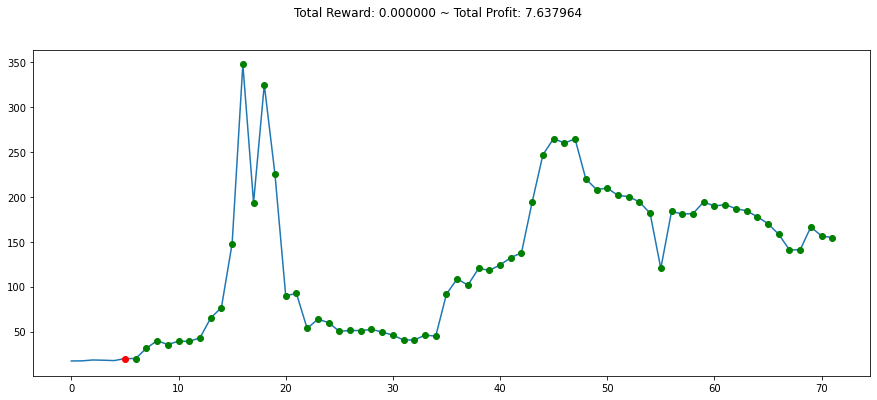

In [10]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, 110), window_size=5)
obs,info = env.reset()
while True:
    action, _states = model.predict(obs)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break


plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()